In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [22]:
len(X_treino)

14345

In [23]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [24]:
len(X_treino_over)

27102

In [25]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [26]:
len(X_treino_under)

14091

In [27]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [28]:
len(X_treino_rd_under)

1588

In [29]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [30]:
len(X_treino_DSTO)

27102

## Parametros e funcoes

In [31]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [33]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.94


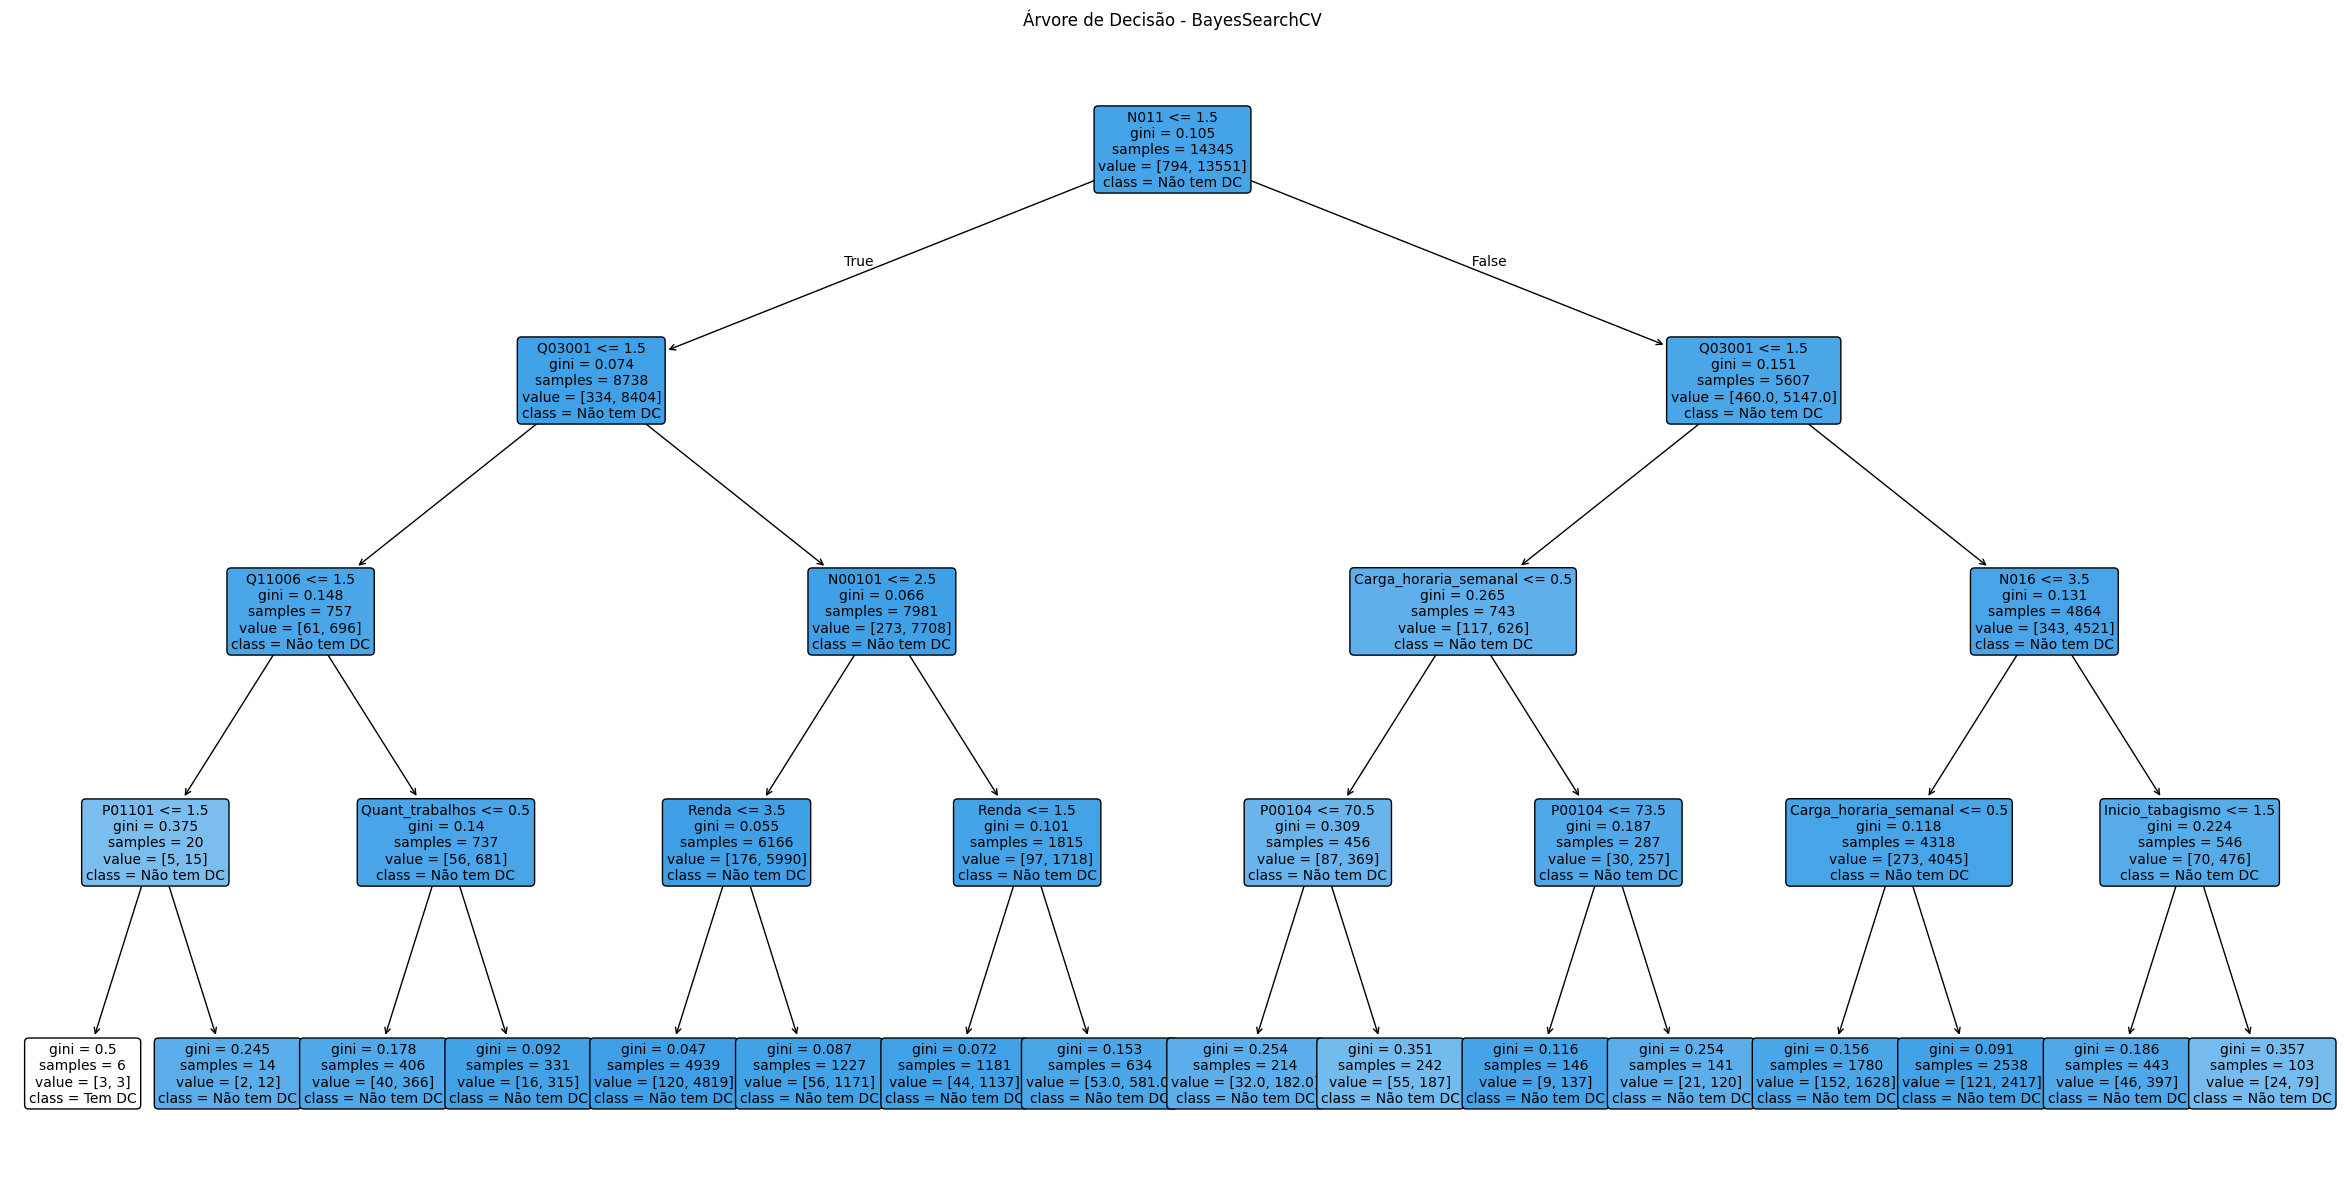

In [34]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

### Resultados

In [35]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.94


In [36]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      0.00      0.01       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.97      0.50      0.49      6148
weighted avg       0.95      0.94      0.91      6148



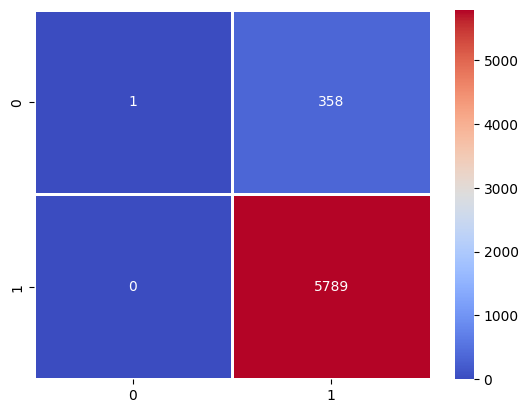

In [37]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [38]:
grid_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.93


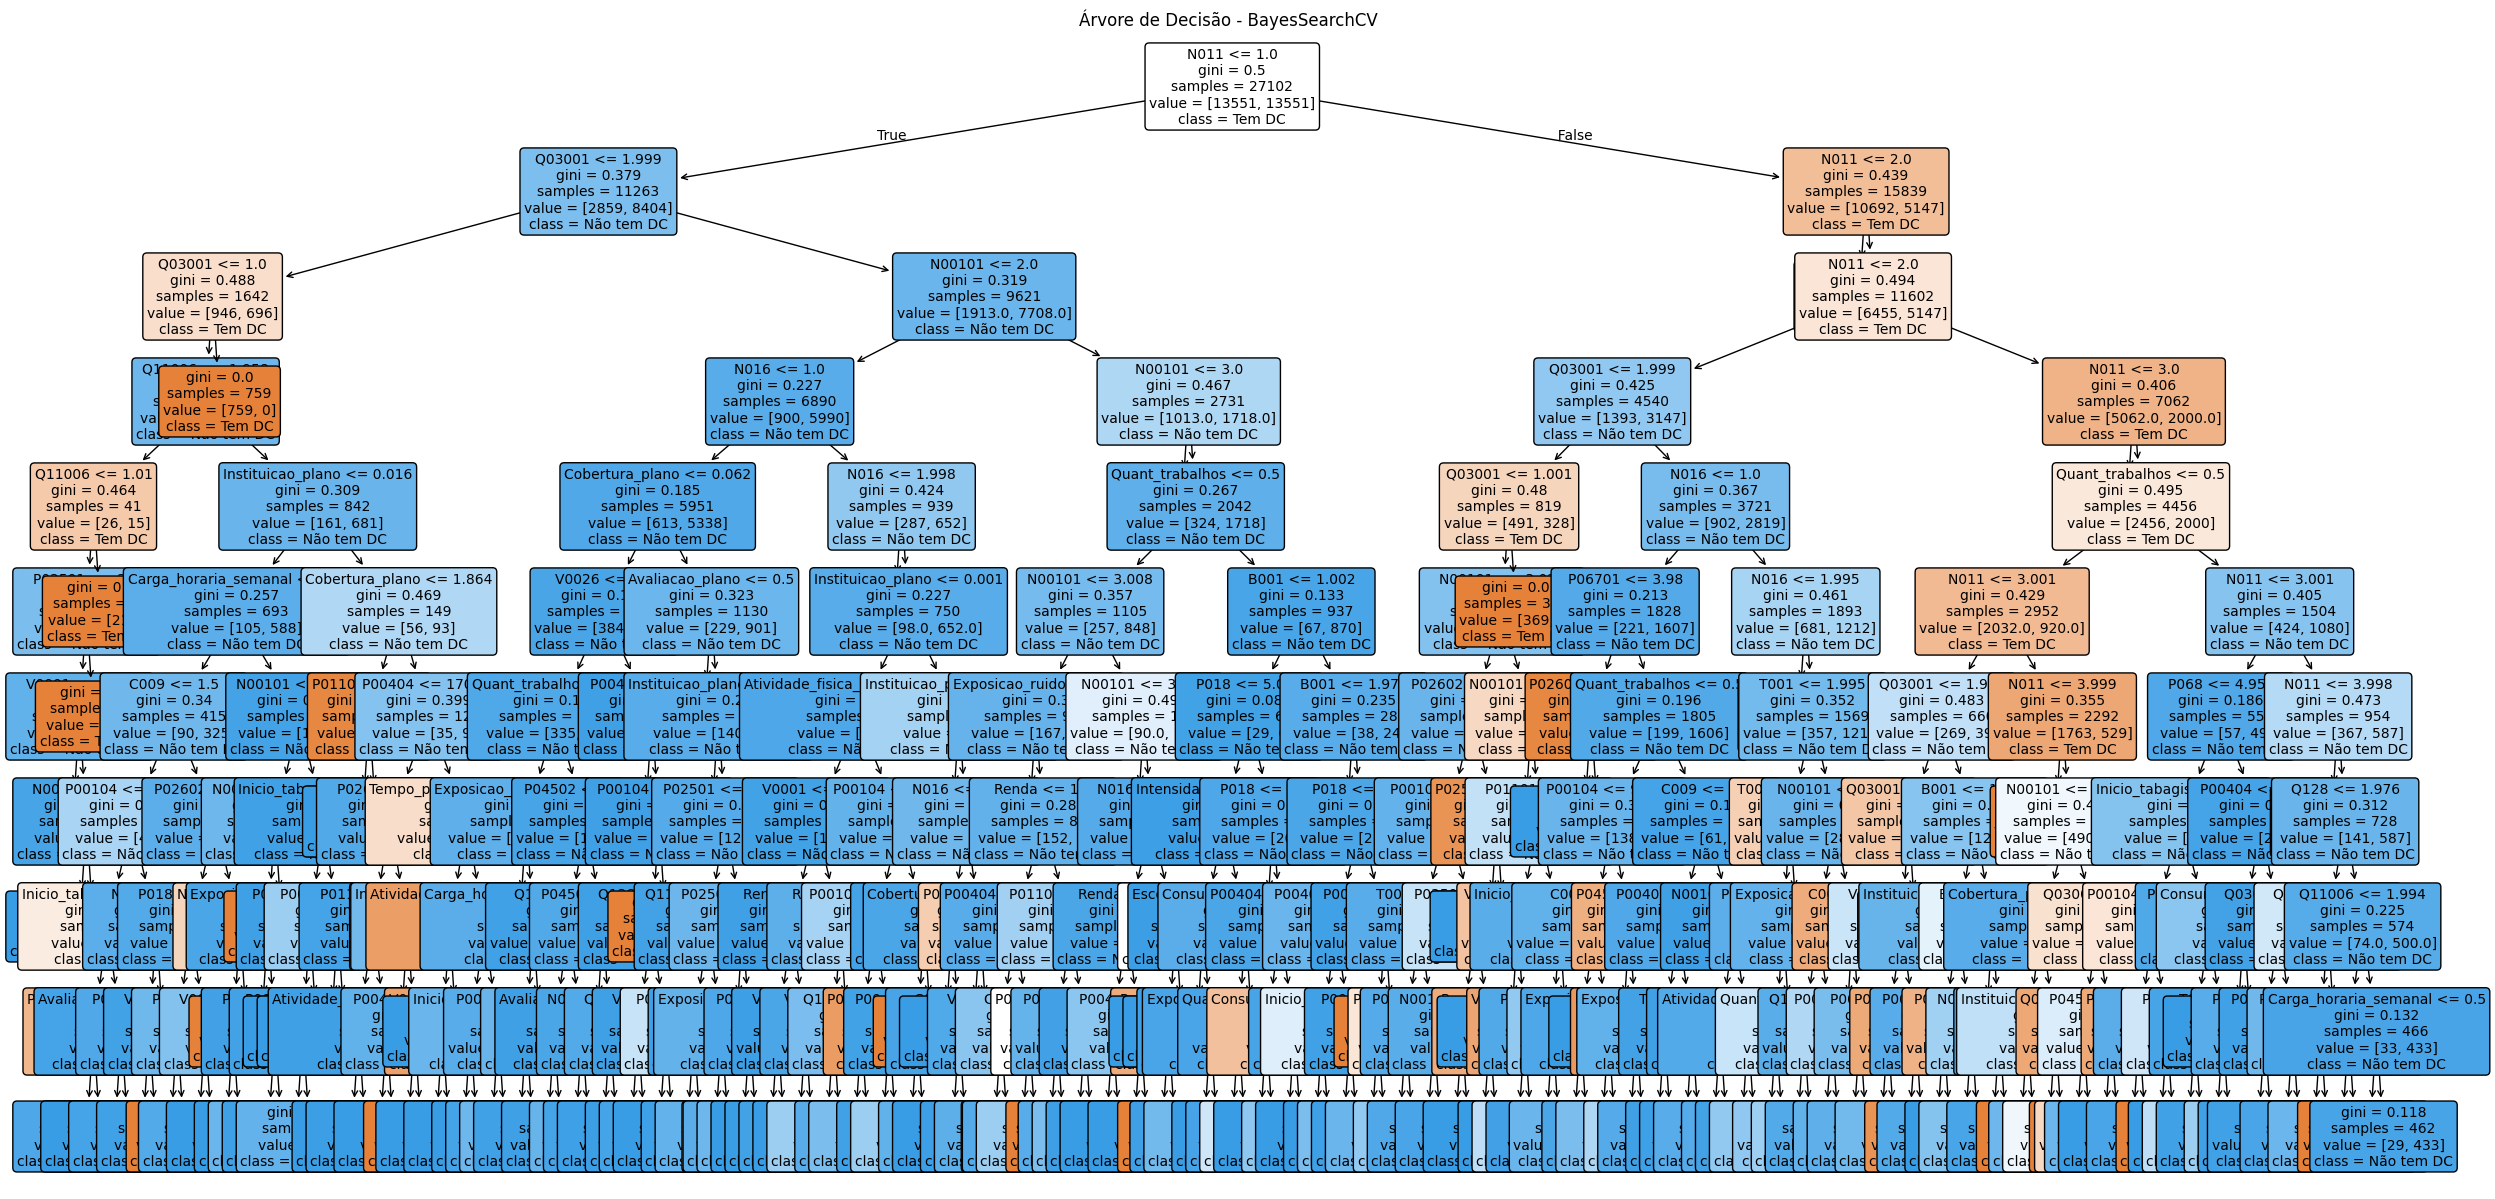

In [39]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [40]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [41]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.11      0.06      0.08       359
         2.0       0.94      0.97      0.96      5789

    accuracy                           0.92      6148
   macro avg       0.53      0.51      0.52      6148
weighted avg       0.89      0.92      0.91      6148



### UnderSampling

In [42]:
grid_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor pontuação de validação cruzada: 0.94


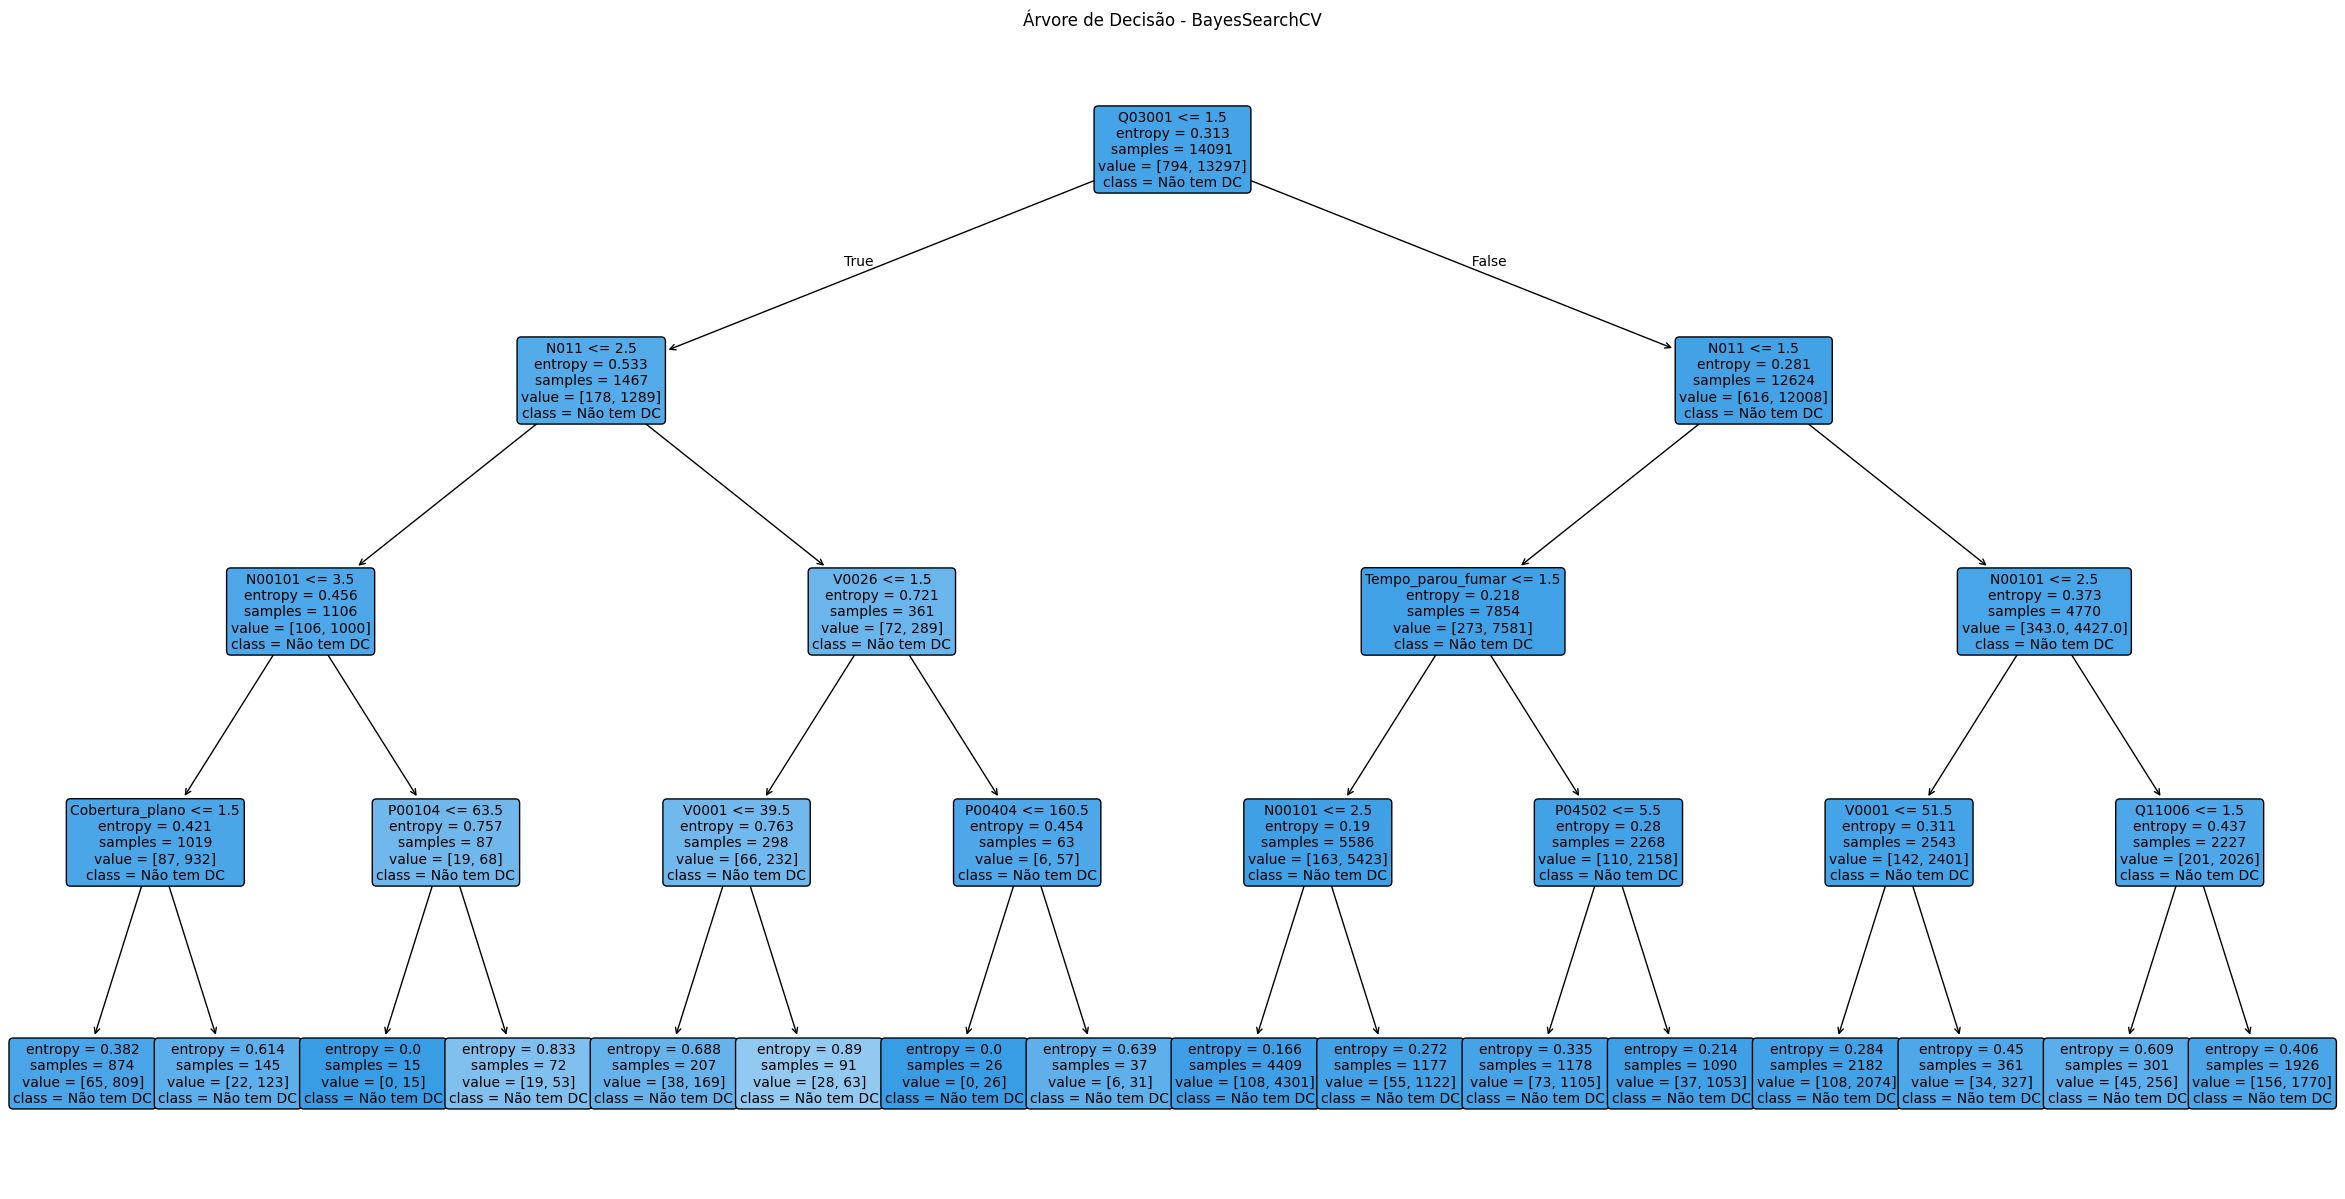

In [43]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [44]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [45]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Random UnderSampling

In [46]:
grid_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.63


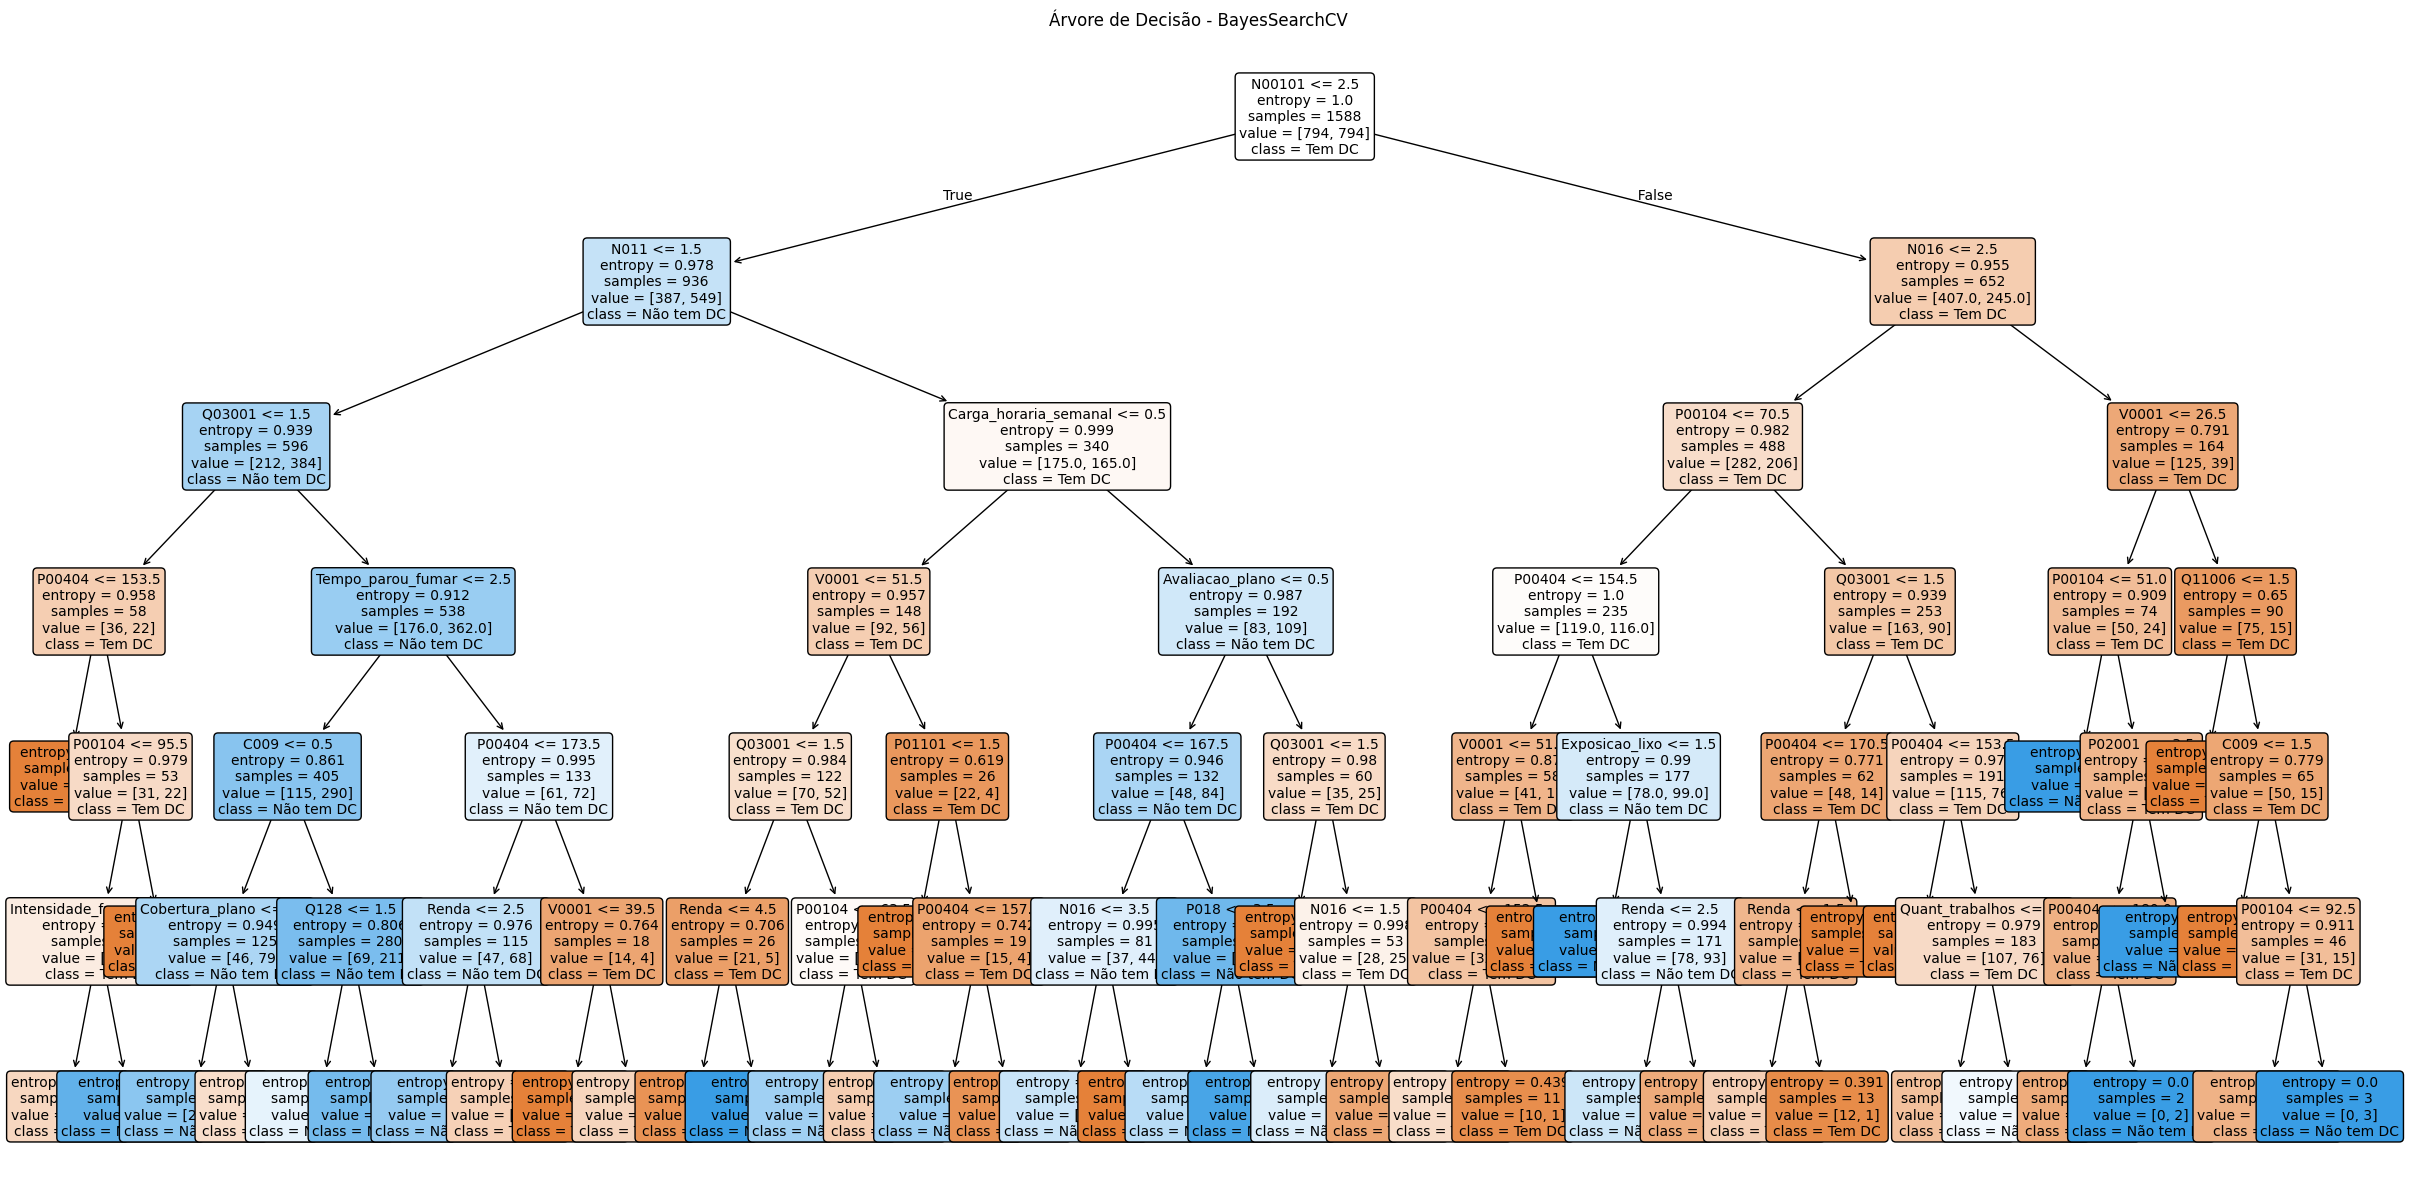

In [47]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [48]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [49]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.09      0.56      0.16       359
         2.0       0.96      0.66      0.78      5789

    accuracy                           0.66      6148
   macro avg       0.53      0.61      0.47      6148
weighted avg       0.91      0.66      0.75      6148



### DSTO

In [50]:
grid_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.97


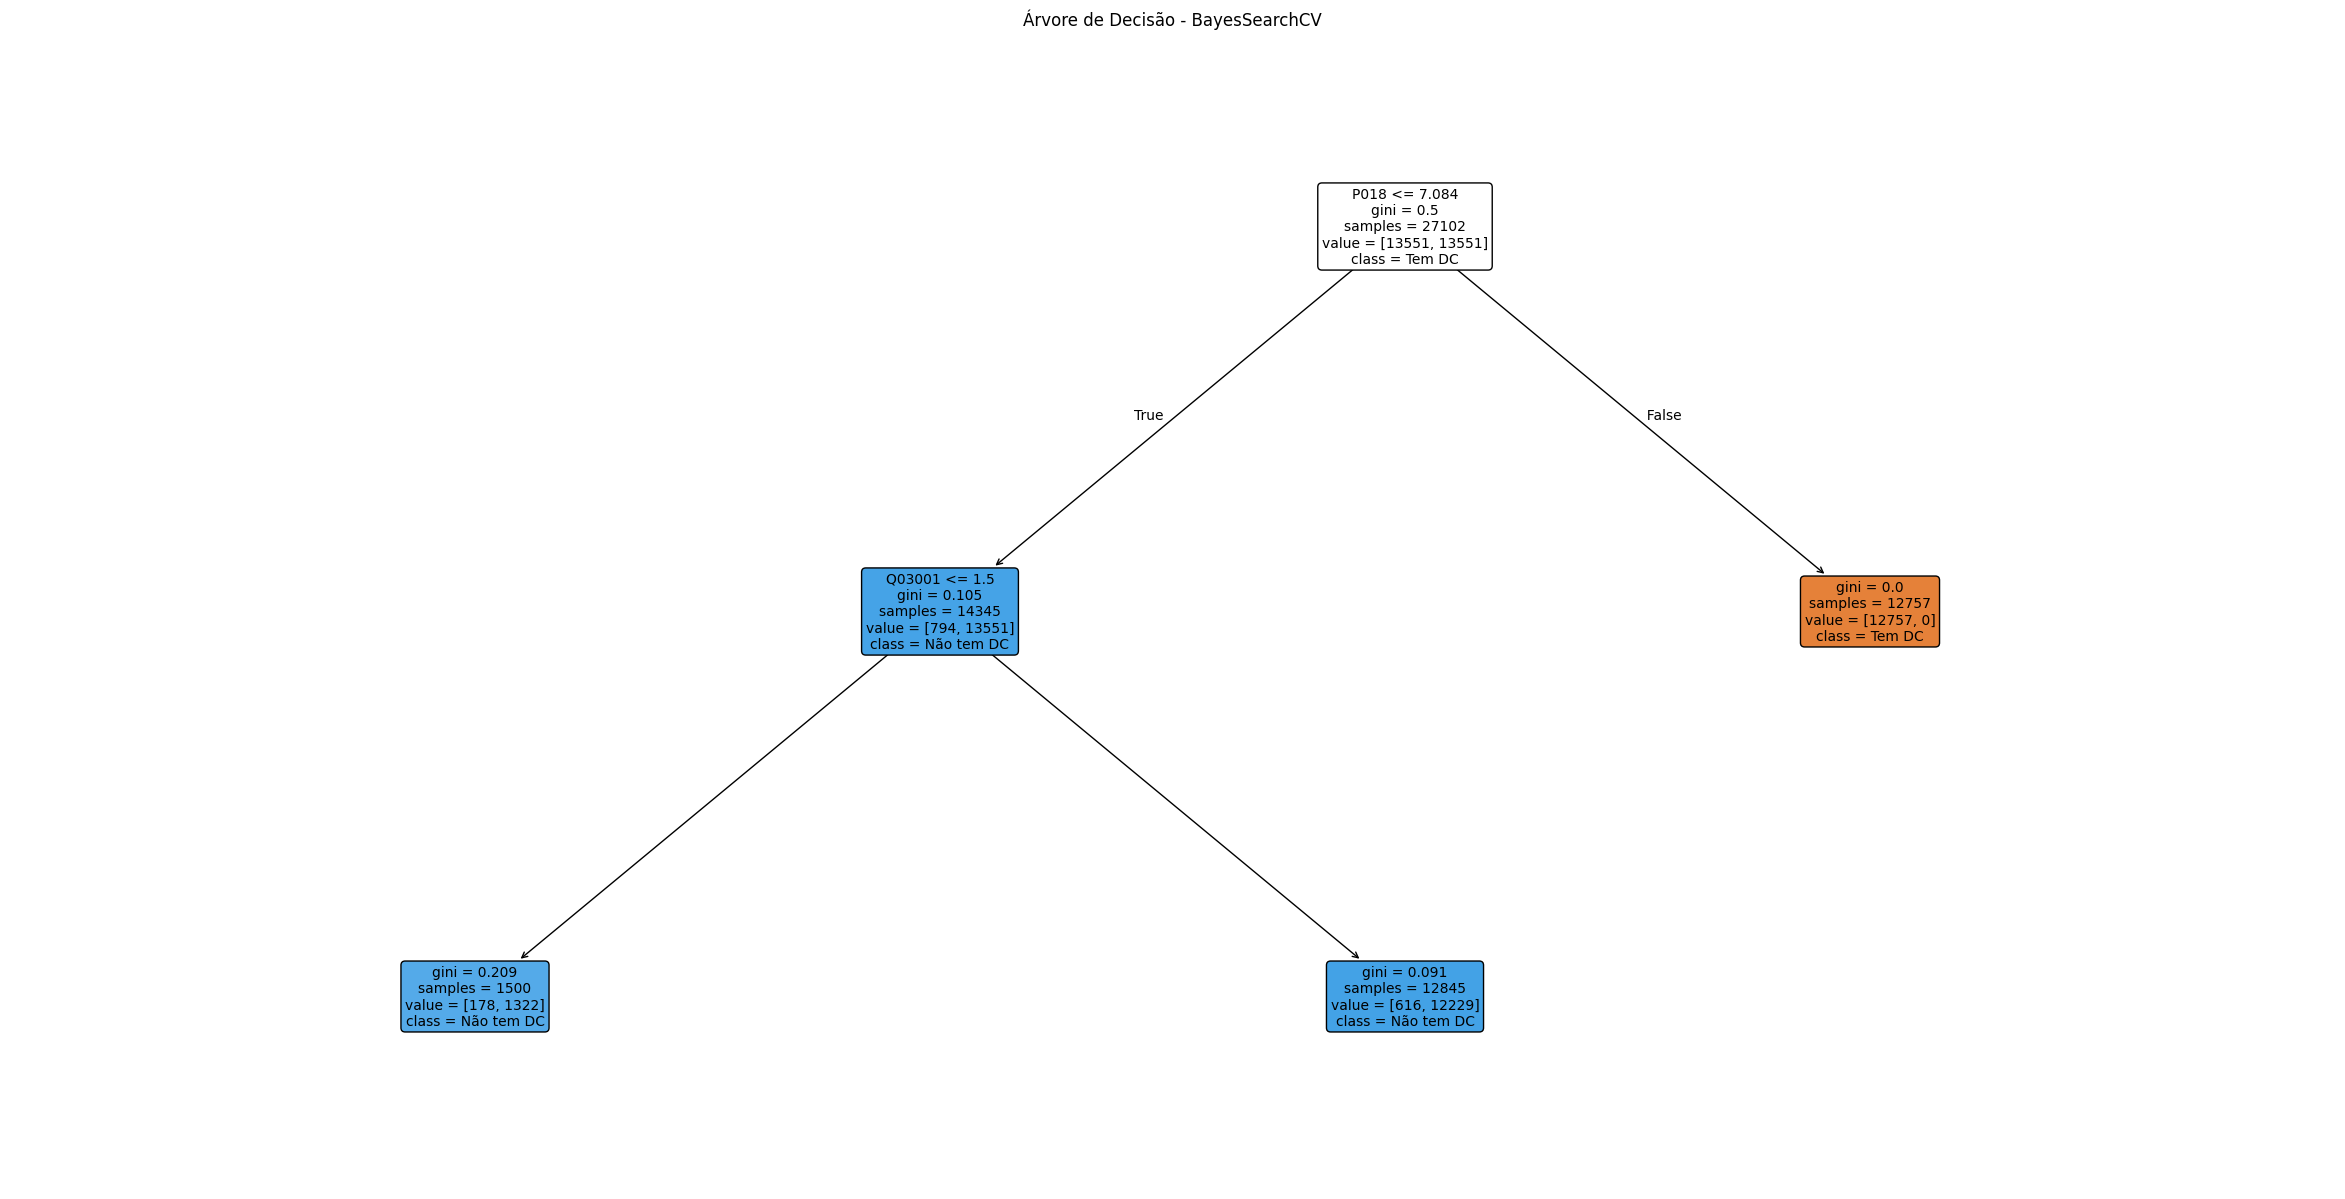

In [51]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem DC', 'Não tem DC'], "Árvore de Decisão - BayesSearchCV")

In [52]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [53]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo